# Project 2: Data Wrangling

In [ ]:
# Import all libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

## Data Gathering

There are three datasets designated for this project and all three datasets have three different ways of accessing them.
In this section we will be gathering all three datasets and loading them into the notebook.

#### - Dataset_1: This is the 'twitter-archive-enhanced.csv' file that has been downloaded and will just be loaded into the notebook.

In [ ]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### - Dataset_2: This is a tsv file which is to be downloaded programatically.
We do this by using the requests library to get the file, then read the file according to its file format.

In [ ]:
# import the requests library 

import requests

In [ ]:
# Input the file url and get it

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [ ]:
# Opening and saving the content in response

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [ ]:
# Reading image-predictions.tsv file into the notebook

df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### - Dataset_3: Data gotten from Twitter API query with tweepy. 

Take the list of tweet_ids in the twitter archive to query the twitter API. Then save JSON in a text file. 

In [ ]:
# Import tweepy

import tweepy
from tweepy import OAuthHandler
import time
import datetime
import requests
import json
import io
import os

In [ ]:
# Get the API object to get the data

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive
index = 0
# dictionary to catch the errors
error_dict = {}
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file
with open ('tweet_json.txt', 'w') as tweet_bk:
    # This will likely take 20 - 30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        index += 1
        try:
            # Get the status data for each of the tweet IDs
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print(str(index) + ": " + "ID - " + str(tweet_id))
            # Convert each tweet status to JSON string and save it in the tweet_bk file
            json.dump(tweet._json, tweet_bk)
            # recognize \n as a break of text
            tweet_bk.write("\n")
            
        # Catching errors that might occur while accessing the tweet data or content
        except tweepy.TweepyException as error:
            print(str(index) + ": " + "ID - " + str(tweet_id) + " has an error:", error.response.text)
            # Appending the errors to the dictionary; error_dict
            error_dict[tweet_id] = error
            
end = time.time()
print(end - start)

Extracting the columns `id`, `retweet_count`, `favourite_count`, `followers_count` and `friends_count` into a list and turn to a dataframe from the tweet_json.txt file that has been created from the twitter API querying.

In [ ]:
# Extract the missing columns from enhanced twitter archive

# Empty list to convert to DataFrame
df_list = []

# Open text file for reading
with open ('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string status into a dictionary and reading each line as a dictionary
        each_tweet_line = json.loads(line)
        # Getting the required parameters
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
        
        df_list.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count,
                       'friends_count': frnds_count})
        
df_3 = pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [ ]:
df_3

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


## Data Assessing

- Using visual and programmatic assessment, point out at least 8 data quality issues and at least two tidiness issues.

#### Visual Assessment

- This entails checking through the dataframe like in a spreadsheet to check for data issues

### Twitter_archive_enhanced - (df_1)

The columns in this datdaframe are described below;

- __tweet_id:__ the unique identifier for each tweet


- **in_reply_to_status_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID


- **in_reply_to_user_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID


- **timestamp:** time when this Tweet was created


- **source:** utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client


- **text:** actual UTF-8 text of the status update


- **retweeted_status_id:** if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID


- **retweeted_status_user_id:** if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID


- **retweeted_status_timestamp:** time of retweet


- **expanded_urls:** tweet URL


- **rating_numerator:** numerator of the rating of a dog. Note: ratings almost always greater than 10


- **rating_denominator:** denominator of the rating of a dog. Note: ratings almost always have a denominator of 10


- **name:** name of the dog


- **doggo:** one of the 4 dog "stage"


- **floofer:** one of the 4 dog "stage"


- **pupper:** one of the 4 dog "stage"


- **puppo:** one of the 4 dog "stageColumns description:

In [ ]:
# Visually assessing df_1 which is the twitter_archive_enhanced data

df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Image_prediction - (df_2)

The columns in this datdaframe are described below;

- **tweet_id:** the unique identifier for each tweet


- **jpg_url:** dog's image URL


- **img_num:** the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)


- **p1:** algorithm's #1 prediction for the image in the tweet


- **p1_conf:** how confident the algorithm is in its #1 prediction


- **p1_dog:** whether or not the #1 prediction is a breed of dog


- **p2:** algorithm's #2 prediction for the image in the tweet


- **p2_conf:** how confident the algorithm is in its #2 prediction


- **p2_dog:** whether or not the #2 prediction is a breed of dog


- **p3:** algorithm's #3 prediction for the image in the tweet


- **p3_conf:** how confident the algorithm is in its #3 prediction


- **p3_dog:** whether or not the #3 prediction is a breed of dog



In [ ]:
# Visually assessing df_2 which is the image_prediction data

df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Tweet_Json - (df_3)

The columns in this datdaframe are described below;

- **id:** the unique identifier for each tweet


- **retweet_count:** the number of times the original tweet was retweeted


- **favorite_count:** the number of times the the original tweet was loved or liked


- **followers_count:** the number of followers of WeRataeDogs account as at the time of the each tweet


- **friends_count:** the number of profiles WeRateDogs account was following at the time of each tweet

In [ ]:
# Visually assessing df_3 which is the tweet_json data

df_3

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


### Programmatic Assessment

- This entails checking the dataframes with code

In [ ]:
#To check the brief summary of the twitter_archive_enhanced dataframe

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
#To check the brief summary of the image_prediction dataframe

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
#To check the brief summary of the tweet_json dataframe

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
 4   friends_count    2354 non-null   int64
dtypes: int64(5)
memory usage: 92.1 KB


In [ ]:
#To check the statistical description of the twitter_archive_enhanced dataframe

df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [ ]:
#To check the statistical description of the image_prediction dataframe

df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
#To check the statistical description of the tweet_json dataframe

df_3.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.0
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06,104.0
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01,0.0
min,6.660209e+17,0.000000,0.000000,3.200799e+06,104.0
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06,104.0
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06,104.0
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06,104.0
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06,104.0


In [ ]:
#To check for the number of columns and rows for the twitter_archive_enhanced dataframe

df_1.shape

(2356, 17)

In [ ]:
#To check for the number of columns and rows for the image_prediction dataframe

df_2.shape

(2075, 12)

In [ ]:
#To check for the number of columns and rows for the tweet_json dataframe

df_3.shape

(2354, 5)

In [ ]:
#To check for random samples in the twitter_archive_enhanced dataframe

df_1.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1347,704364645503647744,NaN,NaN,2016-02-29 17:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He's a Beneplop Cumbers...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704364645...,12,10,Bisquick,None,None,None,None
1521,690690673629138944,NaN,NaN,2016-01-23 00:21:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cedrick. He's a spookster. Did me a di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690690673...,10,10,Cedrick,None,None,None,None
900,758740312047005698,NaN,NaN,2016-07-28 19:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Boston. He's worried because his tongue w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758740312...,12,10,Boston,None,None,None,None
1612,685321586178670592,NaN,NaN,2016-01-08 04:46:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He sleeps like a psychopath. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685321586...,10,10,Rocky,None,None,None,None
1810,676821958043033607,NaN,NaN,2015-12-15 17:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Finally some constructive political change in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676821958...,11,10,None,None,None,None,None
1315,706681918348251136,NaN,NaN,2016-03-07 03:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Katie. She's a Mitsubishi Hufflep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706681918...,12,10,Katie,None,None,None,None
1589,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,None,None,pupper,None


In [ ]:
#To check for random samples in the image_prediction dataframe

df_2.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1987,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,1,cocker_spaniel,0.513191,True,Sussex_spaniel,0.159088,True,standard_poodle,0.149509,True
1879,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
881,698703483621523456,https://pbs.twimg.com/media/CbJLG0HWwAAV-ug.jpg,1,Brittany_spaniel,0.931963,True,Welsh_springer_spaniel,0.030695,True,beagle,0.012896,True
964,706166467411222528,https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg,1,Samoyed,0.430418,True,kuvasz,0.279600,True,Great_Pyrenees,0.117480,True
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
1632,805826884734976000,https://pbs.twimg.com/ext_tw_video_thumb/80582...,1,Siberian_husky,0.248926,True,American_Staffordshire_terrier,0.098313,True,Eskimo_dog,0.080188,True


In [ ]:
#To check for random samples in the tweet_json dataframe

df_3.sample(7)

,id,retweet_count,favorite_count,followers_count,friends_count
312,835246439529840640,83,2259,3200891,104
1126,729823566028484608,1390,4358,3200944,104
191,855818117272018944,5943,28056,3200891,104
1861,675372240448454658,563,1838,3201002,104
2278,667393430834667520,60,211,3201016,104
524,809084759137812480,4046,14685,3200896,104
230,847971574464610304,482,0,3200891,104


In [ ]:
#To check for the number of missing values per column in the twitter_archive_enhanced dataframe

df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [ ]:
#To check for the number of missing values per column in the image_prediction dataframe

df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [ ]:
#To check for the number of missing values per column in the tweet_json dataframe

df_3.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
friends_count      0
dtype: int64

In [ ]:
#To check for the number of duplicate rows in the twitter_archive_enhanced dataframe

df_1.duplicated().sum()

0

In [ ]:
#To check for the number of duplicate rows in the image_prediction dataframe

df_2.duplicated().sum()

0

In [ ]:
#To check for the number of duplicate rows in the tweet_json dataframe

df_3.duplicated().sum()

0

## Quality Issues


### df_1 (Twitter_Archive)

- Any retweeted status and information will not be used, so information that have valid `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` will not be used.


- The columns `in_reply_to_status_id` and `in_reply_to_user_id` contain mostly missing values


- The columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` contain mostly missing values.


- The column `expanded_urls` also have missing values


- The `timestamp` column has the wrong datatype (strings instead of datetime)


- The `tweet_id` column has the wrong datatype (int instead of strings)


- Dog names are only valid if they start with a capital letter in the `name` column.


### df_2 (Image_prediction)

- P1, P2 and P3 values have inconsistent formats. P1 and P3 start with uppercase while P2 is all lowercase.


- The `tweet_id` column has wrong datatype (int instead of string)


### df_3 (tweet_json)

- The `tweet_id` column has wrong datatype (int instead of string)


- The columns `followers_count` and `friends_count` don't have values necessary for the analysis. 


## Tidiness

### df_1 (Twitter_Archive)

- The columns `doggo`, `floofer`,`pupper` and `puppo` should be categorical values of just one column which is `stage`, because each describes which stage the dogs are in.


### General

- Tweet_id column should be the same across the three datasets


- All three tables should be merged into one

## Data Cleaning
In this section, clean all of the issues you documented while assessing.

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of tidy data. The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [ ]:
# Copy all dataframes for cleaning purposes

df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

## Missing Values

#### Issue #1

Tweet ids that are retweets won't be used in our analysis

#### Define

Remove rows that have `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` values.

#### Code:

In [ ]:
# Removing rows that have retweeted_status_id

df_1_clean = df_1_clean[df_1_clean.retweeted_status_id.isnull()]

In [ ]:
# Removing rows that have retweeted_status_id

df_1_clean = df_1_clean[df_1_clean.retweeted_status_id.isnull()]

In [ ]:
# Removing rows that have retweeted_status_timestamp

df_1_clean = df_1_clean[df_1_clean.retweeted_status_timestamp.isnull()]

#### Test

In [ ]:
print(df_1_clean.retweeted_status_id.notnull().sum())
print(df_1_clean.retweeted_status_user_id.notnull().sum())
print(df_1_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


In [ ]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Issue #2, #3 and #4

- The columns `in_reply_to_status_id` and `in_reply_to_user_id` contain mostly missing values


- The columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` contain mostly missing values.


- The column `expanded_urls` also have missing values

#### Define

Drop columns which have most of their values missing (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and `expanded_urls`)

#### Code

In [ ]:
# Make a list of names of columns to be dropped

drop_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
             'retweeted_status_timestamp', 'expanded_urls']

# Drop the columns

df_1_clean.drop(drop_cols, axis=1, inplace=True)

#### Test

In [ ]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [ ]:
#Checking for any missing value in the twitter-archive dataset

df_1_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Erroneous Datatypes

#### Issues #5, #6, #9 and #10

- The `timestamp` column has the wrong datatype (strings instead of datetime)


- The `tweet_id` column has the wrong datatype (int instead of strings) - df_1


- The `tweet_id` column has wrong datatype (int instead of string) - df_2


- The `tweet_id` column has wrong datatype (int instead of string) - df_3

#### Issue #5

#### Define

Convert `timestamp` datatype from strings to datetime

#### Code

In [ ]:
df_1_clean.timestamp = pd.to_datetime(df_1_clean.timestamp)

#### Test

In [ ]:
df_1_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### Issue #6

#### Define

Convert `tweet_id` datatype from int to str

#### Code

In [ ]:
df_1_clean.tweet_id = df_1_clean.tweet_id.astype(str)

#### Test

In [ ]:
df_1_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [ ]:
type(df_1_clean.tweet_id[1])

str

#### Issue #9

#### Define

Convert `tweet_id` datatype from int to str - (df_2_clean)

#### Code

In [ ]:
df_2_clean.tweet_id = df_2_clean.tweet_id.astype(str)

#### Test

In [ ]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [ ]:
type(df_2_clean.tweet_id[1])

str

In [ ]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
 4   friends_count    2354 non-null   int64
dtypes: int64(5)
memory usage: 92.1 KB


#### Issue #10

#### Define

Convert `id` datatype from int to str - (df_3_clean)

#### Code

In [ ]:
df_3_clean.id = df_3_clean.id.astype(str)

#### Test

In [ ]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
 4   friends_count    2354 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 92.1+ KB


In [ ]:
type(df_3_clean.id[1])

str

### Inconsistent Formats

#### Issues #7 and #8

- Dog names are only valid if they start with a capital letter in the `name` column (df_1_clean).


- P1, P2 and P3 values have inconsistent formats. P1 and P3 start with uppercase while P2 is all lowercase (df_2_clean).


#### Issue #7

#### Define

Drop values in the `name` column that starts with lowercase letters 

#### Code

In [ ]:
# Create a list of invalid values thath starts with lowercase

lowercase = []

for name in df_1_clean.name:
    if name.islower() and name not in lowercase:
        lowercase.append(name)
        
print(lowercase)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [ ]:
# Replace the invalid names with None

df_1_clean.name.replace(lowercase, 'None', inplace = True)

#### Test

In [ ]:
# Check if lowercase entries are cleared
# If `name` contains lowercase entries, it will be printed

for names in df_1_clean.name:
    if names.islower():
        print(names)

In [ ]:
# Check samples from the name column

df_1_clean.name.sample(10)

1073       Rorie
2152      Shawwn
1876      Oliver
936         Hank
2138        None
1703    Griswold
1557        None
1855       Ellie
486          Alf
1635        None
Name: name, dtype: object

#### Issue #8

#### Define

Change p1, p2 and p3 to lowercase. 

#### Code

In [ ]:
df_2_clean.p1 = df_2_clean.p1.str.lower()
df_2_clean.p2 = df_2_clean.p2.str.lower()
df_2_clean.p3 = df_2_clean.p3.str.lower()

#### Test

In [ ]:
# Check samples of df_2_clean to see if changes are effected

df_2_clean.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
921,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,pomeranian,0.491022,True,weasel,0.130879,False,yorkshire_terrier,0.099241,True
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,indian_elephant,0.172844,False,water_buffalo,0.038902,False
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,chihuahua,0.217830,True,toy_terrier,0.089149,True
1451,776477788987613185,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,1,labrador_retriever,0.884839,True,chesapeake_bay_retriever,0.057565,True,paintbrush,0.005766,False
91,667544320556335104,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1,pomeranian,0.412893,True,pembroke,0.312958,True,chihuahua,0.071960,True
1340,758740312047005698,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1,chesapeake_bay_retriever,0.848514,True,labrador_retriever,0.110054,True,curly-coated_retriever,0.025201,True
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
1159,733828123016450049,https://pbs.twimg.com/media/Ci8UxxcW0AYgHDh.jpg,2,beagle,0.472324,True,walker_hound,0.121779,True,saint_bernard,0.114640,True
473,675146535592706048,https://pbs.twimg.com/media/CV6aMToXIAA7kH4.jpg,1,dingo,0.288447,False,cardigan,0.229944,True,pembroke,0.190407,True
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,lakeland_terrier,0.073316,True


#### Issue #11

The columns followers_count and friends_count don't have values necessary for the analysis.

#### Define

Drop columns `followers_count` and `friends_count` in df_3_clean 

#### Code

In [ ]:
df_3_clean.drop(['followers_count', 'friends_count'], axis=1, inplace=True)

#### Test

In [ ]:
df_3_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Tidiness

#### Issue #12

The columns doggo, floofer,pupper and puppo should be categorical values of just one column which is 'stage', because each describes which stage the dogs are in.

#### Define

Create a new variable – ‘stage’ to show the four dog stages, drop the four columns, and fill the empty with NaN.

#### Code

In [ ]:
# First replace None in stage columns with empty string as follows
df_1_clean.doggo.replace('None', '', inplace=True)
df_1_clean.floofer.replace('None', '', inplace=True)
df_1_clean.pupper.replace('None', '', inplace=True)
df_1_clean.puppo.replace('None', '', inplace=True)

# Then combine stage columns
df_1_clean['stage'] = df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo

In [ ]:
# Then format entries with multiple dog stages which appeared like doggopuppo

df_1_clean.loc[df_1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_1_clean.loc[df_1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_1_clean.loc[df_1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [ ]:
# Drop the unwanted columns

df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

df_1_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,


In [ ]:
# Replace the empty values in 'stage' with np.nan

df_1_clean.stage = df_1_clean.stage.replace('', np.nan)

#### Test

In [ ]:
df_1_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


#### Issue #13

Tweet_id column should be the same across the three datasets

#### Define

Change the column label 'id' to 'tweet_id' in df_3_clean

#### Code

In [ ]:
df_3_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [ ]:
df_3_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Issue #14

All three tables should be merged into one

#### Define

Merge df_1_clean, df_2_clean and df_3_clean

#### Code

In [ ]:
df = pd.merge(df_1_clean, df_2_clean, on='tweet_id', how='inner').merge(df_3_clean, on='tweet_id', how='inner')

#### Test

In [ ]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [ ]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048


## Storing Data

Save the gathered, assessed, cleaned and merged dataset to a CSV file

In [ ]:
df.to_csv('twitter_archive_master_data.csv', index=False)

In [ ]:
# Read the file back in to check it saved properly

data = pd.read_csv('twitter_archive_master_data.csv')

data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048


## Analysing and Visualizing

In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and visualizations.

In [ ]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   stage               306 non-null    object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

In [ ]:
df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,12.280843,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677
std,41.497718,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,624.750000,1982.000000
50%,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000
75%,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [ ]:
df[df.rating_denominator > 10]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
323,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,None,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,...,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True,3716,13518
662,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,...,0.436377,True,chihuahua,0.113956,True,american_staffordshire_terrier,0.099689,True,2539,5316
800,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",9,11,None,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,...,0.807644,True,kuvasz,0.101286,True,labrador_retriever,0.023785,True,9220,20648
848,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,None,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,1434,4196
891,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,4,20,None,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,...,0.246762,True,greater_swiss_mountain_dog,0.126131,True,weimaraner,0.085297,True,1764,4493
925,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,...,0.396495,True,malamute,0.317053,True,eskimo_dog,0.273419,True,247,2574
946,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,...,0.371816,True,cocker_spaniel,0.177413,True,irish_setter,0.092725,True,829,3062
970,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,80,80,None,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,...,0.948617,True,dandie_dinmont,0.018664,True,cairn,0.015943,True,636,2529
988,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",45,50,None,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,...,0.490783,True,wire-haired_fox_terrier,0.083513,True,english_setter,0.083184,True,721,2634
1054,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,60,50,None,NaN,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,...,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,1028,3201


In [ ]:
df.name.value_counts()/df.shape[0]*100

None       32.296891
Charlie     0.551655
Cooper      0.501505
Oliver      0.501505
Lucy        0.501505
             ...    
Herb        0.050150
Meyer       0.050150
Tuck        0.050150
Rubio       0.050150
Grizzie     0.050150
Name: name, Length: 914, dtype: float64

## Insights:
- The minimum favorite count is 81, mean is 8896, and the maximum favorite count is 132810


- The minimum retweet count is 16, mean is 2767, and the maximum retweet count is 79515


- About 32% of the dogs have no name


- Image number 1 is the most prominent (frequent)

### Visualizations

#### Which image number occurs the most corresponds with the most confident prediction in the neural network data?

C:\Users\Darasimi199\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most Image Number Correspondent to Prediction')

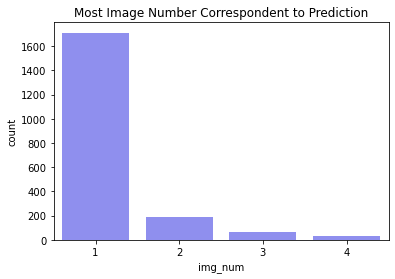

In [ ]:
# Do a countplot for the img_num column.

sns.countplot(df['img_num'], color='blue', alpha = 0.5)
plt.title('Most Image Number Correspondent to Prediction')

In [ ]:
# Get the value count of each image number value
df.img_num.value_counts()


1    1711
2     191
3      62
4      30
Name: img_num, dtype: int64

The above graph shows that the most occcuring image number that corresponds to each tweet's most confident prediction is 1.

### Question 2: What is the most popular dog stage according to the neural network's image prediction dataset?

Text(0.5, 1.0, 'The Distribution of Dog Stages')

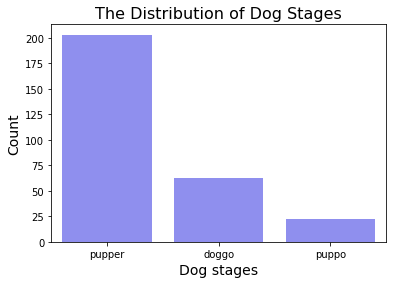

In [ ]:
sorted_age = data['stage'].value_counts().head(3).index
sns.countplot(data = df, x ='stage', order = sorted_age, color='blue', alpha = 0.5)
plt.xlabel('Dog stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Stages', fontsize=16)

In [ ]:
# Get the value count of each dog stage
df.stage.value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: stage, dtype: int64

Looking at the distribution of dog images, it shows that 'pupper' (a small doggo, usually younger) is the most popular dog stage, followed by 'doggo' and 'puppo'. It could be due to the fact that young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there's huge amount of missing data in the dog stages, thus the distribution may not reflect the truth.

### Question 3: Does retweet count positively correlate with favourite count?

In [ ]:
df.corr(method='pearson')

,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
rating_numerator,1.000000,0.198240,-0.000684,-0.009049,-0.029150,-0.020724,-0.034601,-0.004173,-0.029355,0.013879,0.009995
rating_denominator,0.198240,1.000000,-0.004094,-0.004240,0.000640,-0.034964,-0.000709,0.007071,0.004695,-0.021193,-0.028682
img_num,-0.000684,-0.004094,1.000000,0.204406,0.032674,-0.156773,0.052354,-0.141409,0.062725,0.107198,0.137053
p1_conf,-0.009049,-0.004240,0.204406,1.000000,0.126961,-0.509531,0.142268,-0.707994,0.119391,0.054591,0.079727
p1_dog,-0.029150,0.000640,0.032674,0.126961,1.000000,0.109214,0.635698,0.045770,0.558604,0.008552,0.054368
p2_conf,-0.020724,-0.034964,-0.156773,-0.509531,0.109214,1.000000,0.096064,0.480743,0.063713,-0.018472,-0.021680
p2_dog,-0.034601,-0.000709,0.052354,0.142268,0.635698,0.096064,1.000000,0.033552,0.554644,0.016161,0.060189
p3_conf,-0.004173,0.007071,-0.141409,-0.707994,0.045770,0.480743,0.033552,1.000000,0.032731,-0.044230,-0.053752
p3_dog,-0.029355,0.004695,0.062725,0.119391,0.558604,0.063713,0.554644,0.032731,1.000000,0.010015,0.041207
retweet_count,0.013879,-0.021193,0.107198,0.054591,0.008552,-0.018472,0.016161,-0.044230,0.010015,1.000000,0.912947


#### `retweet_count` is highly positively correlated with `favorite_Count`: r^2 = 0.928

C:\Users\Darasimi199\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

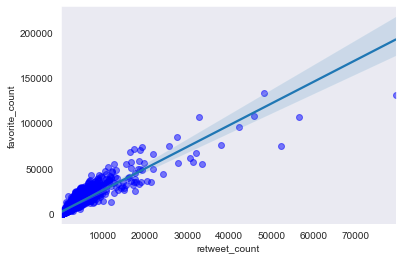

In [ ]:
sns.set_style('dark')
sns.regplot(df.retweet_count, data.favorite_count, scatter_kws = {'color': 'blue', 'alpha': 0.5})

In the above plot, we are trying to check the linear relationship between retweet_count and favorite_count.

We see that there is a linear relationship between the two varibales. This doesn't mean that increase in retweet_count causes an increase in favorite_count but when you compare both linearly, there is a strong positive linear relation between `retweet_count` and `favorite_Count`.

The data used for the above analysis and visualizations is the final merged data which was later saved as twitter_archive_master_data.csv